In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [6]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [7]:
bikes = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/bikes_sharing.csv')

In [8]:
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


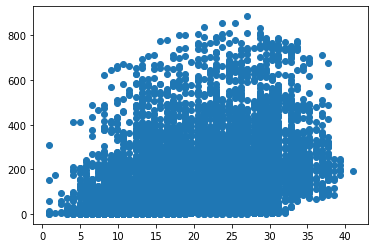

In [9]:
plt.scatter(bikes['temp'],bikes['registered'])

In [10]:
results = ols("casual ~ temp + humidity + workingday", data=bikes).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 casual   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     2766.
Date:                Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:15:43   Log-Likelihood:                -54939.
No. Observations:               10886   AIC:                         1.099e+05
Df Residuals:                   10882   BIC:                         1.099e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.1426      1.663     31.961      0.0

In [11]:
"y_hat = 53.1426 + 2.9255temp - 0.8365humidity - 36.0416workingday"

'y_hat = 53.1426 + 2.9255temp - 0.8365humidity - 36.0416workingday'

In [12]:
53.1426 + (2.9255*9.84) - (0.8365*81) - (36.0416*0)#first line of data

14.173019999999994

In [13]:
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [14]:
pred_vals = results.predict(bikes[['temp','humidity','workingday']])
#The inner set of square brackets ['temp','humidity','workingday'] 
# creates a list of column names: 'temp', 'humidity', and 'workingday'.
#  This list specifies the columns that should be selected from the bikes DataFrame.
# the outer brackets [ ] are used to access those columns from the DataFrame. 

#using the type() function to check if it's dataframe

# DataFrame can be thought of as a table or spreadsheet-like data structure,
#  where data is organized in rows and columns. 


In [15]:
pred_vals
#type: float

0        14.175362
1        12.612922
2        12.612922
3        19.194189
4        19.194189
           ...    
10881    20.856745
10882    12.602536
10883     6.857740
10884     6.857740
10885     0.276474
Length: 10886, dtype: float64

In [16]:
res = pd.concat([pred_vals.to_frame().rename(columns={0:'y_hat'}),bikes['casual']], axis=1)

In [17]:
res

,y_hat,casual
0,14.175362,3
1,12.612922,8
2,12.612922,5
3,19.194189,3
4,19.194189,0
...,...,...
10881,20.856745,7
10882,12.602536,10
10883,6.857740,4
10884,6.857740,12


In [19]:
res['error'] = res['y_hat'] - res['casual']

In [20]:
res.head(1)

,y_hat,casual,error
0,14.175362,3,11.175362


In [21]:
res['sq_error'] = res['error']**2

In [22]:
np.sqrt(res['sq_error'].mean())

37.630976661566216

In [23]:
bikes.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


(array([   9.,   18.,   48.,   95.,  160.,  315., 2110., 5562., 2344.,
         225.]),
 array([-278.91580946, -241.14950457, -203.38319967, -165.61689478,
        -127.85058988,  -90.08428498,  -52.31798009,  -14.55167519,
          23.2146297 ,   60.9809346 ,   98.7472395 ]),
 <BarContainer object of 10 artists>)

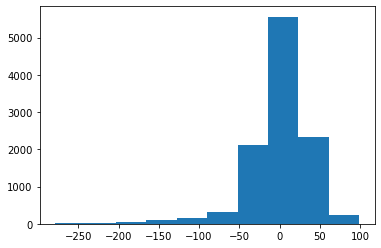

In [24]:
plt.hist(res['error'])
#the model is not normal distribution, so not working 

(array([7447., 1807.,  805.,  322.,  203.,  127.,   98.,   48.,   18.,
          11.]),
 array([  0. ,  36.7,  73.4, 110.1, 146.8, 183.5, 220.2, 256.9, 293.6,
        330.3, 367. ]),
 <BarContainer object of 10 artists>)

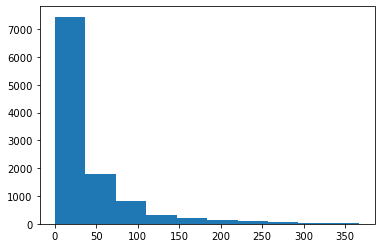

In [25]:
plt.hist(bikes['casual'])

In [26]:
bikes.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


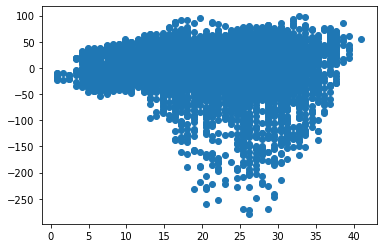

In [27]:
plt.scatter(bikes['temp'],res['error'])
# the model tends to underpredict

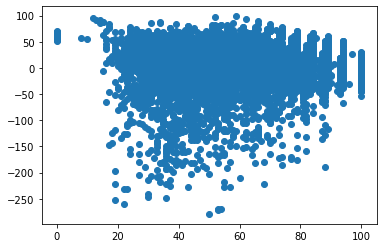

In [28]:
plt.scatter(bikes['humidity'],res['error'])
#underpredict rage is quiet large, and few overpredict

((array([-3.83154229, -3.60754977, -3.48462983, ...,  3.48462983,
          3.60754977,  3.83154229]),
  array([-278.91580946, -271.42522287, -270.06496056, ...,   94.67880447,
           97.00144858,   98.7472395 ])),
 (35.25481020993881, -3.0224401336369475e-14, 0.9365456663477374))

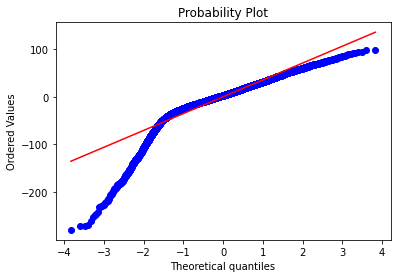

In [29]:
import scipy.stats as stats
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(res['error'], dist='norm', plot=ax)
#qq plot

In [30]:
infl = results.get_influence()
print(infl.summary_frame())


       dfb_Intercept  dfb_temp  dfb_humidity  dfb_workingday       cooks_d  \
0          -0.002088  0.003502     -0.002551        0.004024  1.135234e-05   
1          -0.000981  0.001573     -0.000984        0.001658  1.996754e-06   
2          -0.001620  0.002597     -0.001623        0.002736  5.438450e-06   
3          -0.003977  0.005157     -0.002407        0.005842  2.186977e-05   
4          -0.004714  0.006113     -0.002853        0.006924  3.072312e-05   
...              ...       ...           ...             ...           ...   
10881      -0.002906  0.002324      0.002299       -0.002460  7.083872e-06   
10882      -0.000409  0.000491      0.000195       -0.000466  2.282366e-07   
10883      -0.000384  0.000606      0.000067       -0.000516  2.865256e-07   
10884       0.000690 -0.001090     -0.000121        0.000928  9.277390e-07   
10885       0.000378 -0.000874      0.000153        0.000677  5.320960e-07   

       standard_resid  hat_diag  dffits_internal  student_resid

In [31]:
infl.summary_frame()

,dfb_Intercept,dfb_temp,dfb_humidity,dfb_workingday,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.002088,0.003502,-0.002551,0.004024,1.135234e-05,-0.296994,0.000515,-0.006739,-0.296982,-0.006738
1,-0.000981,0.001573,-0.000984,0.001658,1.996754e-06,-0.122593,0.000531,-0.002826,-0.122588,-0.002826
2,-0.001620,0.002597,-0.001623,0.002736,5.438450e-06,-0.202321,0.000531,-0.004664,-0.202312,-0.004664
3,-0.003977,0.005157,-0.002407,0.005842,2.186977e-05,-0.430365,0.000472,-0.009353,-0.430348,-0.009353
4,-0.004714,0.006113,-0.002853,0.006924,3.072312e-05,-0.510090,0.000472,-0.011086,-0.510073,-0.011085
...,...,...,...,...,...,...,...,...,...,...
10881,-0.002906,0.002324,0.002299,-0.002460,7.083872e-06,-0.368198,0.000209,-0.005323,-0.368183,-0.005323
10882,-0.000409,0.000491,0.000195,-0.000466,2.282366e-07,-0.069153,0.000191,-0.000955,-0.069150,-0.000955
10883,-0.000384,0.000606,0.000067,-0.000516,2.865256e-07,-0.075935,0.000199,-0.001071,-0.075931,-0.001071
10884,0.000690,-0.001090,-0.000121,0.000928,9.277390e-07,0.136638,0.000199,0.001926,0.136632,0.001926


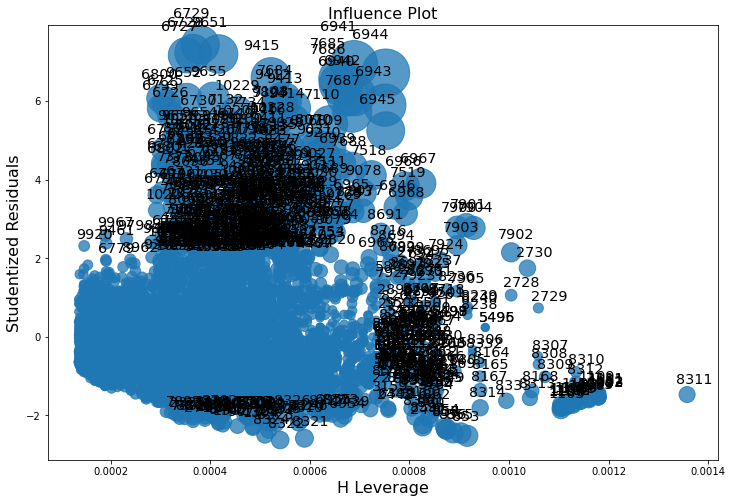

In [32]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax, criterion='cooks')
#leverage: 不是很影响
#residuals: 影响，并且bubble越大越影响，可以观察中间上面的bubble，大概率是outlier
# 右上角有bubble, 可以直接remove，中间有需要check
#looking for big circle, we cannot remove outlier easily, we cannot easily determine 
# if its a outlier, only when it influence all variables, its an outlier 

In [33]:
res

,y_hat,casual,error,sq_error
0,14.175362,3,11.175362,124.888726
1,12.612922,8,4.612922,21.279053
2,12.612922,5,7.612922,57.956588
3,19.194189,3,16.194189,262.251766
4,19.194189,0,19.194189,368.416901
...,...,...,...,...
10881,20.856745,7,13.856745,192.009387
10882,12.602536,10,2.602536,6.773194
10883,6.857740,4,2.857740,8.166680
10884,6.857740,12,-5.142260,26.442834


In [34]:
dummies_season = pd.get_dummies(bikes.season, dtype=int)
#The pd.get_dummies() function is used to convert categorical/numeric
#  variables into binary/dummy variables. 
# dummy: 转化成 1 or 0 的column

In [35]:
dummies_season.rename(columns = {1:'win', 2:'spr', 3:'sum', 4:'fall'}, inplace = True)

In [36]:
bikes = pd.concat([bikes,dummies_season], axis=1)

In [37]:
bikes

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,win,spr,sum,fall
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,1,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,1,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,0,0,0,1
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,0,0,0,1
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,0,0,0,1
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,0,0,0,1


In [71]:
#dummies_temp = pd.get_dummies(bikes.temp, dtype=float)
temp_df = pd.get_dummies(pd.cut(bikes['temp'], bins=[0, 10, 20, 30, 45], labels=['cold', 'warm', 'okay', 'hot']))\
    .rename(columns={'cold': 'cold', 'warm': 'warm', 'okay': 'Okay', 'hot': 'hot'})

In [39]:
bikes_2 = pd.concat([bikes,temp_df], axis=1)

In [40]:
bikes_2

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,win,spr,sum,fall,cold,warm,Okay,hot
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,0,0,0,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,0,0,0,1,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,1,0,0,0,1,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,1,0,0,0,1,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,0,0,0,1,0,1,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,0,0,0,1,0,1,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,0,0,0,1,0,1,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,0,0,0,1,0,1,0,0


In [41]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  win         10886 non-null  int64  
 13  spr         10886 non-null  int64  
 14  sum         10886 non-null  int64  
 15  fall        10886 non-null  int64  
dtypes: float64(3), int64(12), object(1)
memory usage: 1.3+ MB


In [42]:
# convert to datetime
bikes['datetime'] = pd.to_datetime(bikes['datetime'])

In [43]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  win         10886 non-null  int64         
 13  spr         10886 non-null  int64         
 14  sum         10886 non-null  int64         
 15  fall        10886 non-null  int64         
dtypes: datetime64[ns](1), 

In [44]:
daily_dataset = bikes.set_index('datetime').resample("D").agg(
    {'workingday':'max','humidity':'max','temp':'mean','casual':'sum','registered':'sum'})

In [45]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso

In [47]:
bikes = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/bikes_sharing.csv')

In [48]:
bikes.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [49]:
# separate features and target
categorical_features = ['workingday','season', 'weather']
numerical_features = ['temp','humidity', 'windspeed']
target = 'casual'

In [50]:
# split data in train / test
X_train, X_test, y_train, y_test = train_test_split(bikes[categorical_features + numerical_features]
                                                    ,bikes[target],
                                                    test_size = 0.3, random_state=1234)

test_size=0.3 specifies that 30% of the data will be allocated for testing, while 70% will be used for training.

bikes[categorical_features + numerical_features] represents the input features (both categorical and numerical) from the bikes DataFrame that will be used for training and testing.

bikes[target] represents the target variable or the variable you are trying to predict from the bikes DataFrame.

random_state=1234 sets a random seed for reproducibility. This ensures that the same train-test split is obtained if the code is run again with the same random seed.

In [51]:
# define transformers
#imput: fillinf missing value
#imput.simpleimputer
#imput.iterativeimputer
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

StandardScaler(): This step uses the StandardScaler class from scikit-learn to standardize numerical features. It scales the numerical data to have zero mean and unit variance, which can be important for certain machine learning algorithms that assume data to be normally distributed.

OneHotEncoder class from scikit-learn to perform one-hot encoding on categorical features. It converts categorical variables into a binary vector representation, where each category is represented by a separate binary column. 



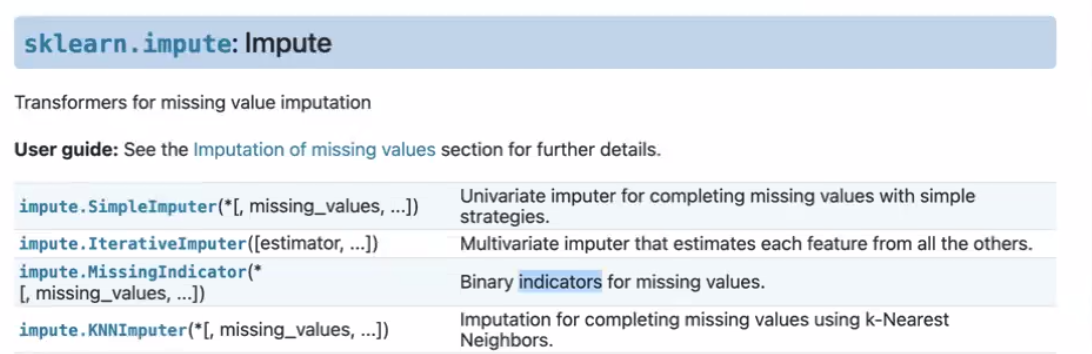

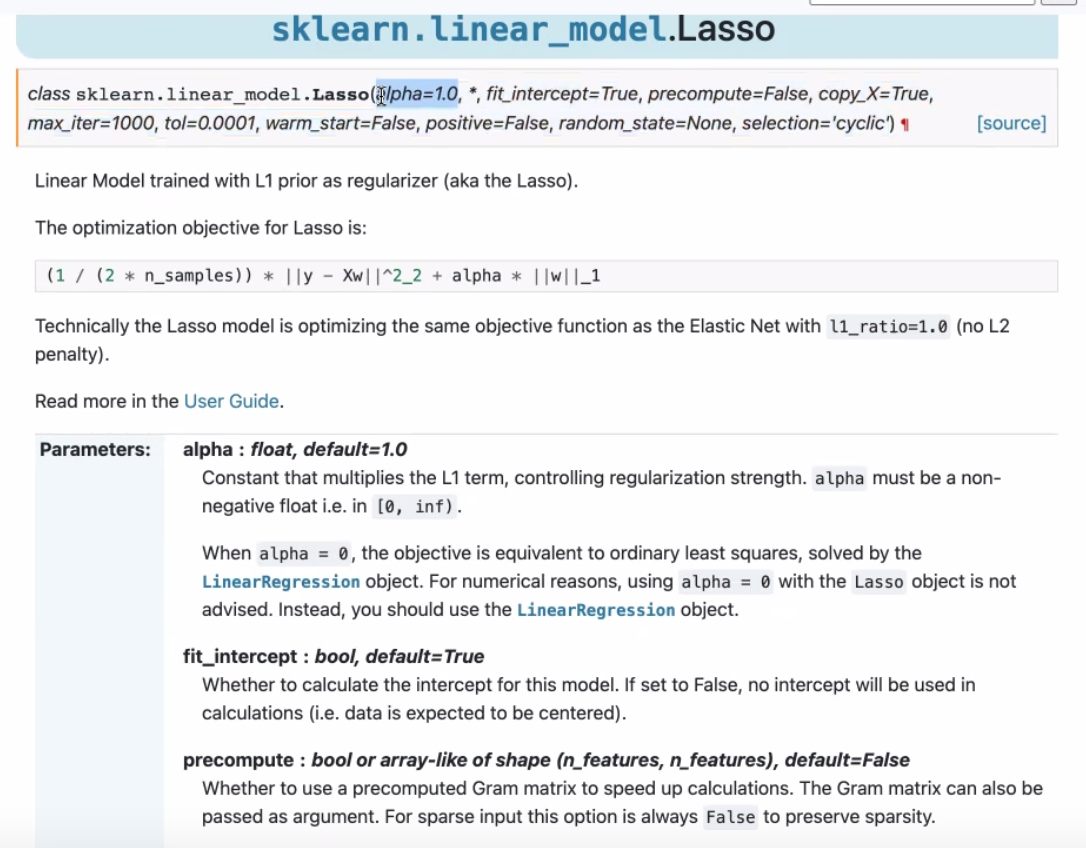

In linear regression, the goal is to fit a linear model that predicts the target variable based on the input features. However, when there are many features or when some features are highly correlated, it can lead to overfitting or difficulties in interpreting the model.

Lasso addresses these issues by adding a penalty term to the objective function, which is the sum of the squared residuals. The penalty term is the L1 norm (absolute sum) of the coefficients multiplied by a regularization parameter, typically denoted as λ (lambda). The L1 norm encourages sparsity in the coefficient estimates, meaning it tends to push the coefficients of irrelevant or less important features towards zero, effectively performing feature selection.

In [52]:
# building processor
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical_features),
                                                 ('num', num_transformer, numerical_features)])
#categorical_features is a list of column names indicating which columns in the dataset are categorical.
#numerical_features is a list of column names indicating which columns in the dataset are numerical.
#By creating the preprocessor with ColumnTransformer, you are specifying that the categorical features 
# should be transformed using the cat_transformer pipeline, and the numerical features should be transformed
#  using the num_transformer pipeline

In [53]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [54]:
linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['workingday', 'season',
                                                   'weather']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['temp', 'humidity',
                                                   'windspeed'])])),
                ('regressor', LinearRegression())])

In [55]:
pred = linear_regression.predict(X_test)

In [56]:
pred

array([  2.578125,  52.671875,  28.765625, ..., -11.46875 ,   9.125   ,
        11.484375])

In [57]:
from sklearn.metrics import mean_squared_error

In [58]:
np.sqrt(mean_squared_error(pred,y_test))

37.04807418138248

In [59]:
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=3.0))
])

In [60]:
ridge_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['workingday', 'season',
                                                   'weather']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['temp', 'humidity',
                                                   'windspeed'])])),
                ('regressor', Ridge(alpha=3.0))])

In [61]:
pred_ridge = ridge_regression.predict(X_test)

In [62]:
np.sqrt(mean_squared_error(pred_ridge,y_test))

37.04428469172452

In [63]:
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
])

In [64]:
lasso_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['workingday', 'season',
                                                   'weather']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['temp', 'humidity',
                                                   'windspeed'])])),
                ('regressor', Lasso())])

In [65]:
lasso_pred = lasso_regression.predict(X_test)

In [66]:
np.sqrt(mean_squared_error(lasso_pred, y_test))

37.32788927335004

In [67]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.8))
])

In [68]:
elasticnet_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['workingday', 'season',
                                                   'weather']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['temp', 'humidity',
                                                   'windspeed'])])),
                ('regressor', ElasticNet(l1_ratio=0.8))])

In [69]:
elasticnet_pred = elasticnet_regression.predict(X_test)

In [70]:
np.sqrt(mean_squared_error(elasticnet_pred, y_test))

38.376526508419815